In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [215]:
dataset = pd.read_csv("dataset_after_preprocessing.csv")

In [162]:
dataset.head(3)

,imdb_id,movie_title,genre,imdb_rating,vote_count,release_year,release_month,runtime,actors,director,worldwide_gross,origin_Language,origin_Country
0,tt1375666,Inception,action,8.8,2663086,2010,7,148,"['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ...",Christopher Nolan,292587330,English,United States
1,tt0446029,Scott Pilgrim vs. the World,action,7.5,479551,2010,8,112,"['Michael Cera', 'Mary Elizabeth Winstead', 'K...",Edgar Wright,33525605,English,United States
2,tt1104001,Tron: Legacy,action,6.8,363816,2010,12,125,"['Jeff Bridges', 'Garrett Hedlund', 'Olivia Wi...",Joseph Kosinski,172062763,English,United States


**Overview of Processed Dataset**

In [163]:
dataset.shape

(6602, 13)

In [92]:
dataset.columns

Index(['imdb_id', 'movie_title', 'genre', 'imdb_rating', 'vote_count',
       'release_year', 'release_month', 'runtime', 'actors', 'director',
       'worldwide_gross', 'origin_Language', 'origin_Country'],
      dtype='object')

In [93]:
dataset.dtypes

imdb_id             object
movie_title         object
genre               object
imdb_rating        float64
vote_count           int64
release_year         int64
release_month        int64
runtime              int64
actors              object
director            object
worldwide_gross      int64
origin_Language     object
origin_Country      object
dtype: object

**Statistical Analysis**

In [164]:
dataset[["imdb_rating","vote_count","runtime","worldwide_gross"]].describe()

,imdb_rating,vote_count,runtime,worldwide_gross
count,6602.000000,6.602000e+03,6602.000000,6.602000e+03
mean,6.156862,8.993972e+04,104.805362,5.950892e+07
std,1.126260,1.801120e+05,21.676768,1.289807e+08
min,1.100000,1.010000e+02,44.000000,1.003500e+04
25%,5.500000,3.803500e+03,91.000000,5.345317e+06
50%,6.300000,2.522600e+04,101.000000,1.939231e+07
75%,6.900000,9.284700e+04,115.000000,5.337345e+07
max,9.500000,2.996308e+06,467.000000,2.052415e+09


Trends/ Outliers in Revenue and Rating data

In [165]:
yearly_gross = dataset.groupby('release_year')['worldwide_gross'].sum()
yearly_gross_sorted = yearly_gross.sort_values(ascending=False)
print(yearly_gross_sorted)

release_year
2017    27548099195
2018    24881333380
2015    24743159055
2016    24702248613
2014    24479870762
2011    19363913248
2013    19301746204
2019    19140603823
2003    19088675860
2012    18914727589
2002    18125229584
2001    17977277268
2009    17885307111
2004    16911380228
2007    16708759854
2008    16431651992
2000    15097375797
2005    14285045241
2006    13464332169
2020    11990073997
2010    11837046778
Name: worldwide_gross, dtype: int64


In [166]:
yearly_ratings = dataset.groupby('release_year')['imdb_rating'].mean()
yearly_ratings_sorted = yearly_ratings.sort_values(ascending=False)
print(yearly_ratings_sorted)

release_year
2019    6.377551
2018    6.374516
2016    6.348882
2013    6.318301
2009    6.219608
2017    6.216561
2011    6.203226
2007    6.199691
2014    6.194481
2015    6.181269
2012    6.155195
2006    6.148923
2004    6.128852
2010    6.118069
2005    6.049841
2002    6.031988
2020    6.031613
2000    6.029276
2008    6.018125
2001    6.012424
2003    5.972699
Name: imdb_rating, dtype: float64


**Data Visualization:**

In [98]:
numerical_columns = ['imdb_rating', 'vote_count','runtime','worldwide_gross']

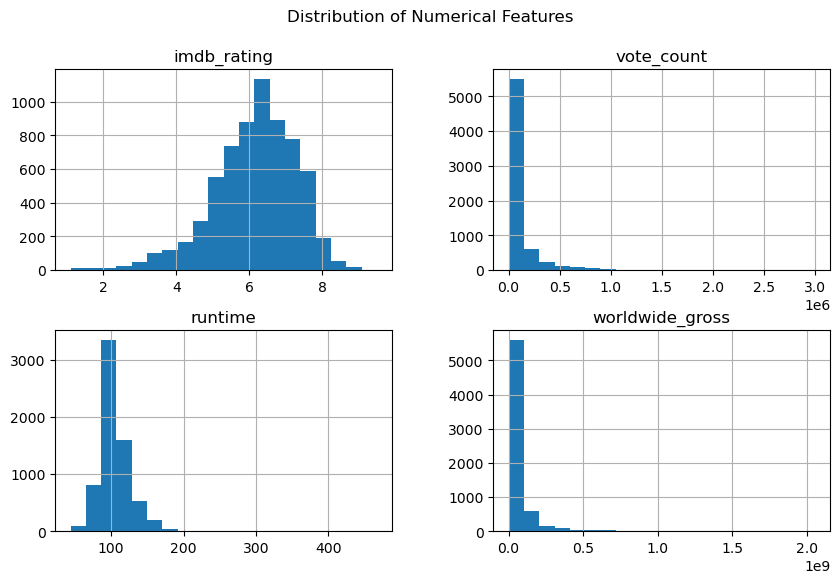

In [167]:
# Histograms for numerical columns
dataset[numerical_columns].hist(bins=20, figsize=(10, 6))
plt.suptitle('Distribution of Numerical Features')
plt.show()



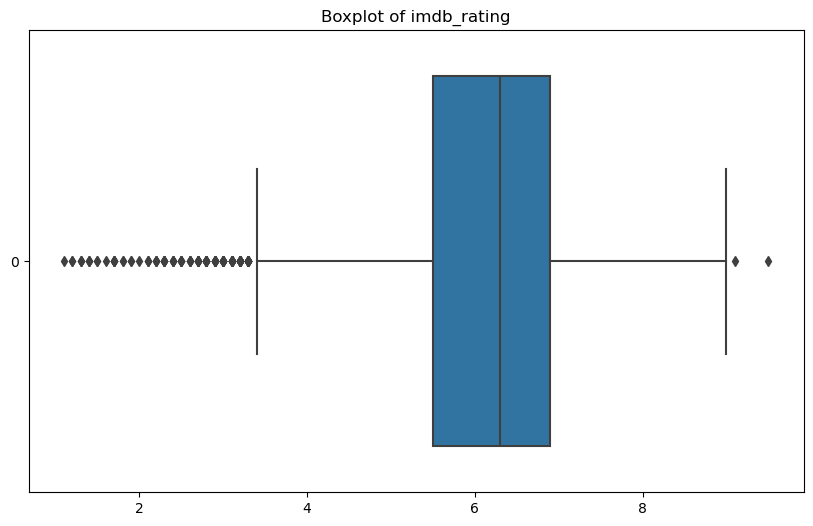

In [168]:
# Boxplot for imdb_rating
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset['imdb_rating'], orient='h')
plt.title('Boxplot of imdb_rating')
plt.show()

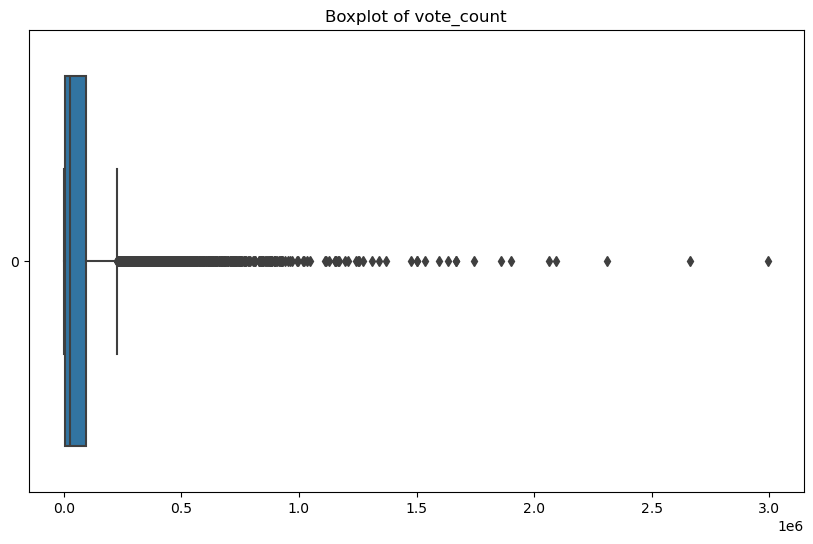

In [169]:
# Boxplot for vote_count
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset['vote_count'], orient='h')
plt.title('Boxplot of vote_count')
plt.show()

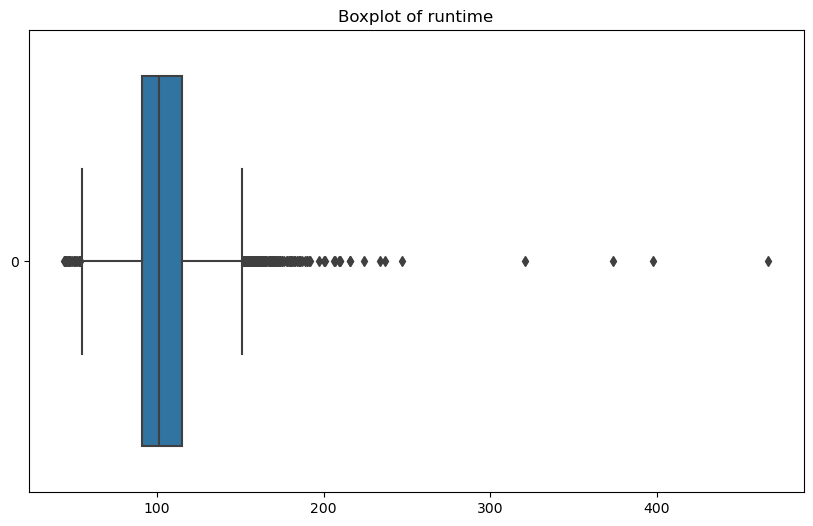

In [170]:
# Boxplot for runtime
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset['runtime'], orient='h')
plt.title('Boxplot of runtime')
plt.show()

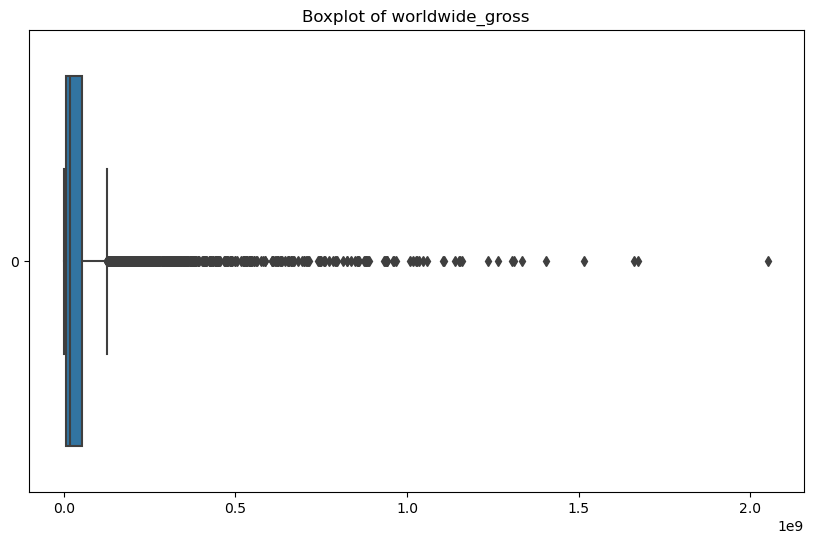

In [171]:
# Boxplot for worldwide_gross
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset['worldwide_gross'], orient='h')
plt.title('Boxplot of worldwide_gross')
plt.show()

Relationship between numerical columns

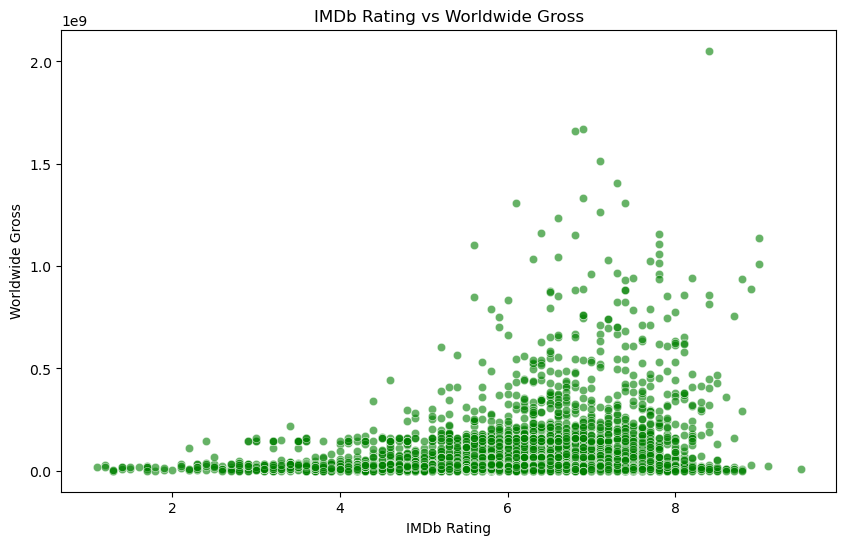

In [172]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='imdb_rating', y='worldwide_gross', alpha=0.6, color='green')
plt.title('IMDb Rating vs Worldwide Gross')
plt.xlabel('IMDb Rating')
plt.ylabel('Worldwide Gross')
plt.show()

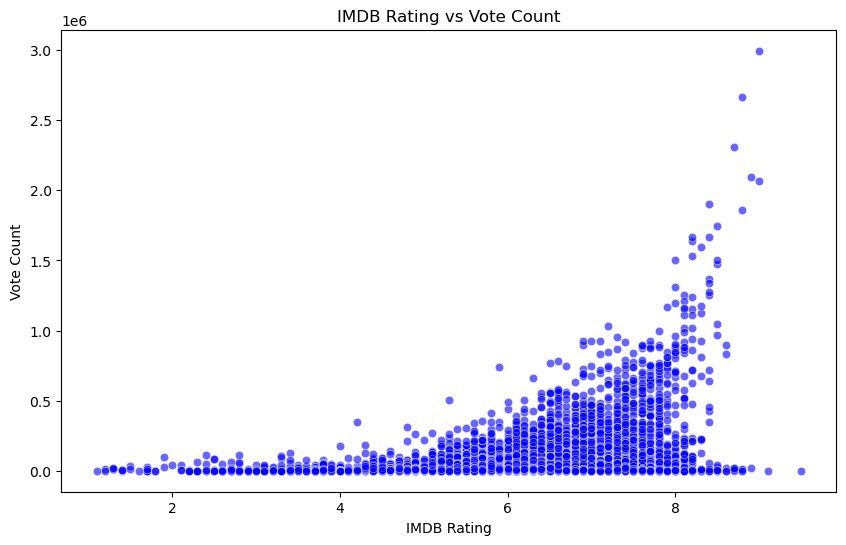

In [173]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='imdb_rating', y='vote_count', alpha=0.6, color='blue')
plt.title('IMDB Rating vs Vote Count')
plt.xlabel('IMDB Rating')
plt.ylabel('Vote Count')
plt.show()

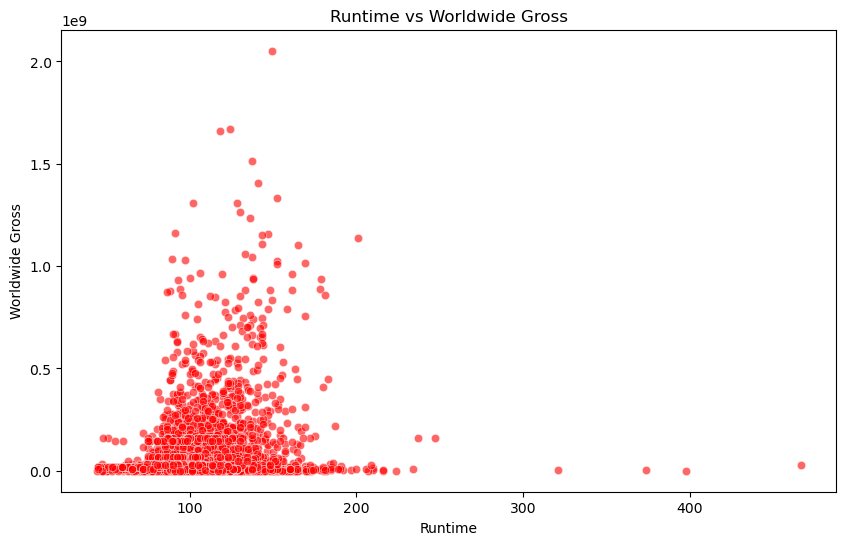

In [174]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='runtime', y='worldwide_gross', alpha=0.6, color='red')
plt.title('Runtime vs Worldwide Gross')
plt.xlabel('Runtime')
plt.ylabel('Worldwide Gross')
plt.show()

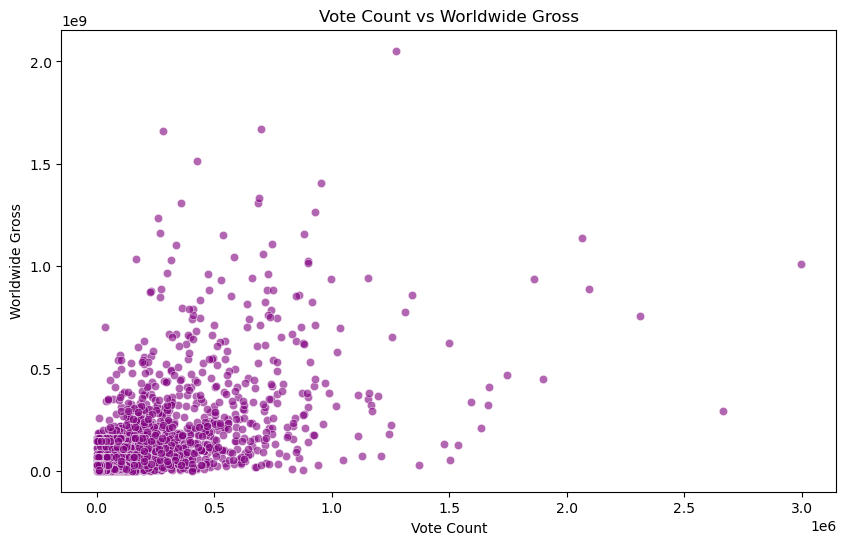

In [280]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='vote_count', y='worldwide_gross', alpha=0.6, color='purple')
plt.title('Vote Count vs Worldwide Gross')
plt.xlabel('Vote Count')
plt.ylabel('Worldwide Gross')
plt.show()

Analysis of Categorical Columns

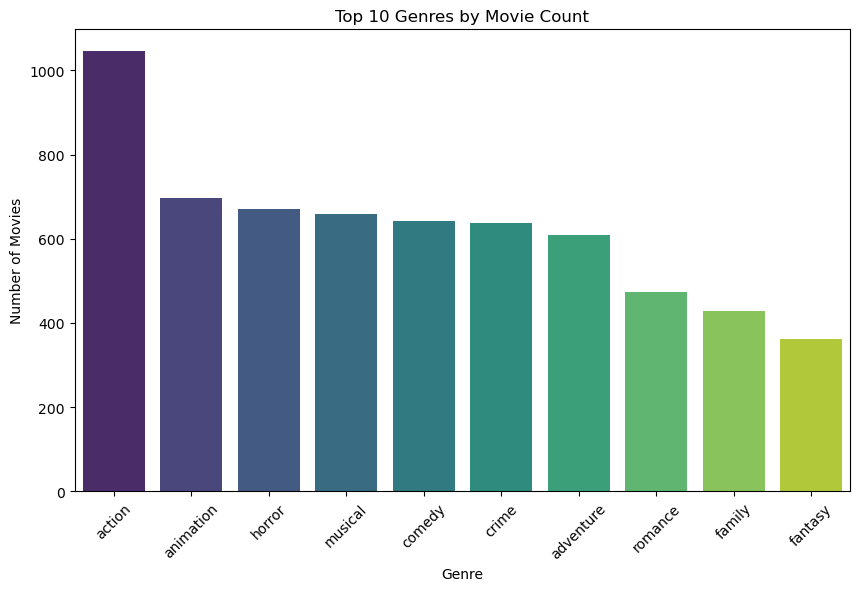

In [126]:
# Count movies by genre
genre_counts = dataset['genre'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Top 10 Genres by Movie Count')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

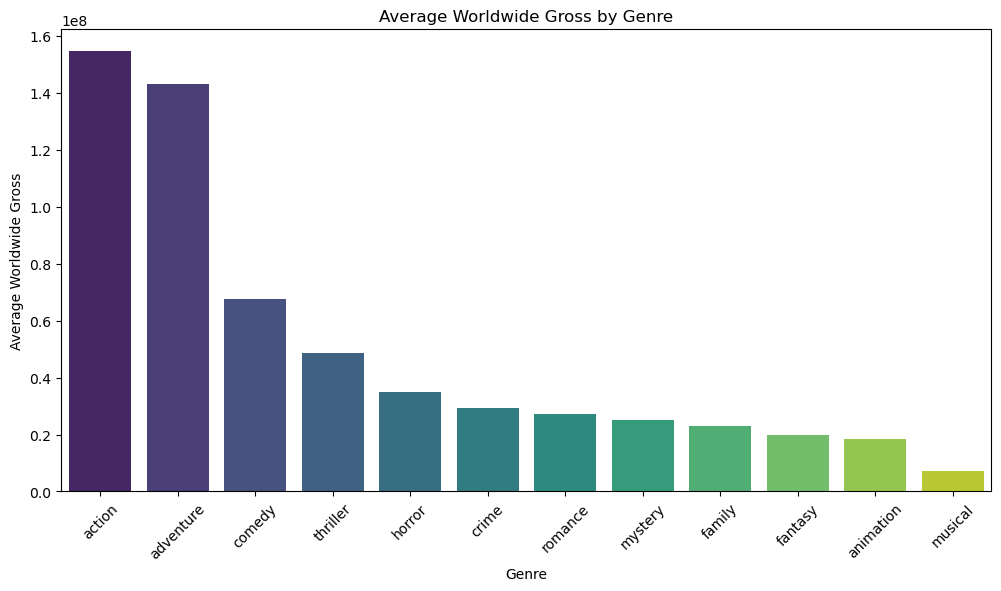

In [128]:
# Worldwide gross by genre
genre_gross = dataset.groupby('genre')['worldwide_gross'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_gross.index, y=genre_gross.values, palette='viridis')
plt.title('Average Worldwide Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Worldwide Gross')
plt.xticks(rotation=45)
plt.show()

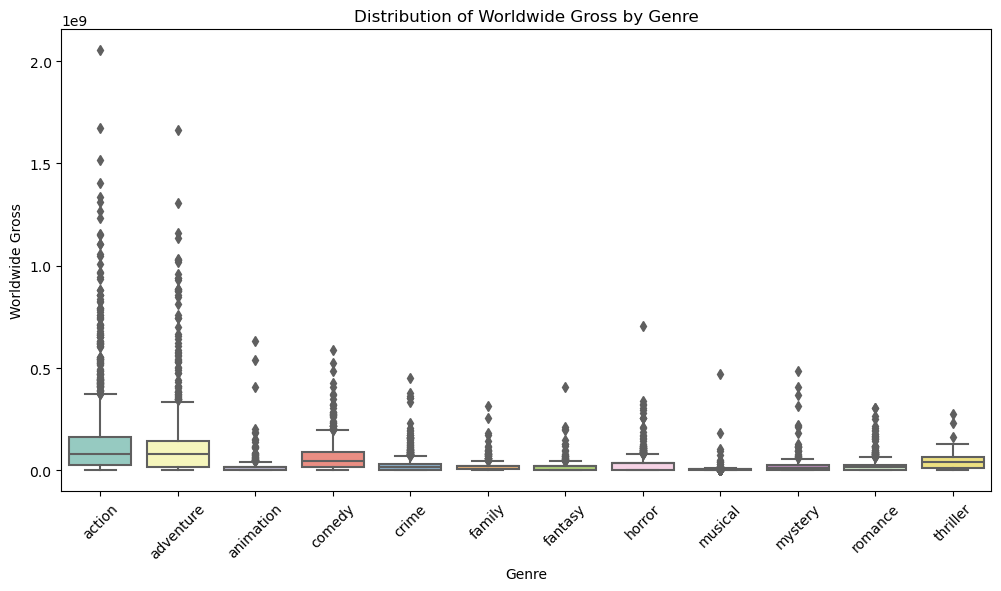

In [130]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset, x='genre', y='worldwide_gross', palette='Set3')
plt.title('Distribution of Worldwide Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Worldwide Gross')
plt.xticks(rotation=45)
plt.show()

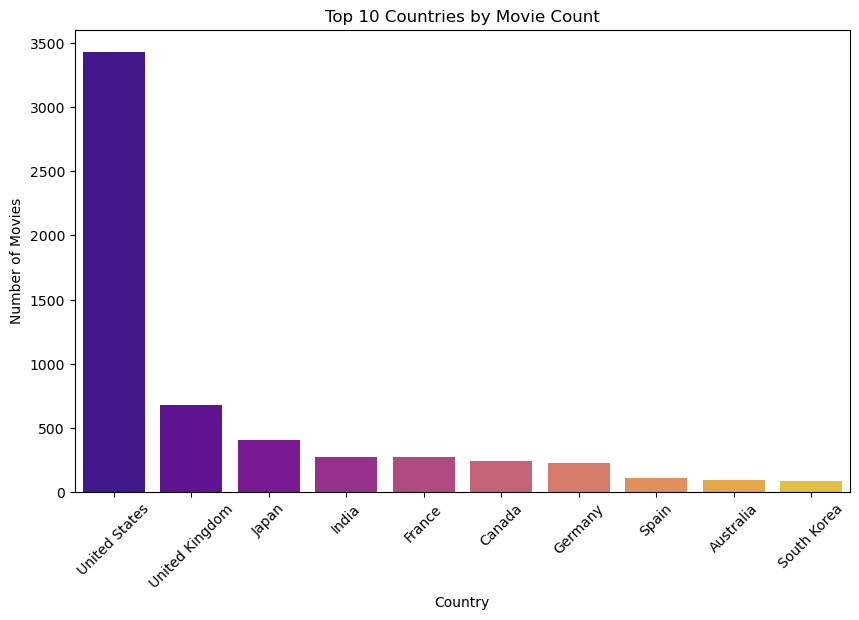

In [145]:
# Count movies by country
country_counts = dataset['origin_Country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='plasma')
plt.title('Top 10 Countries by Movie Count')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

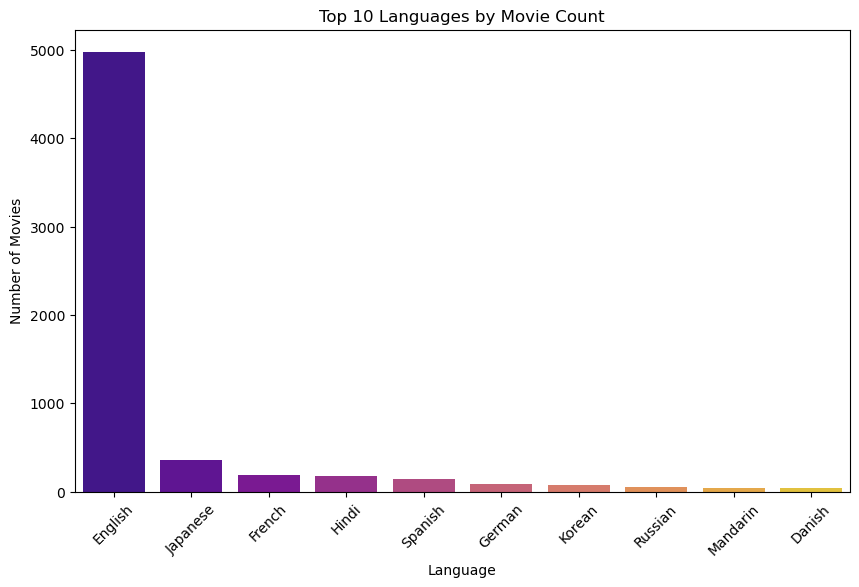

In [146]:
# Count movies by languages
language_counts = dataset['origin_Language'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette='plasma')
plt.title('Top 10 Languages by Movie Count')
plt.xlabel('Language')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

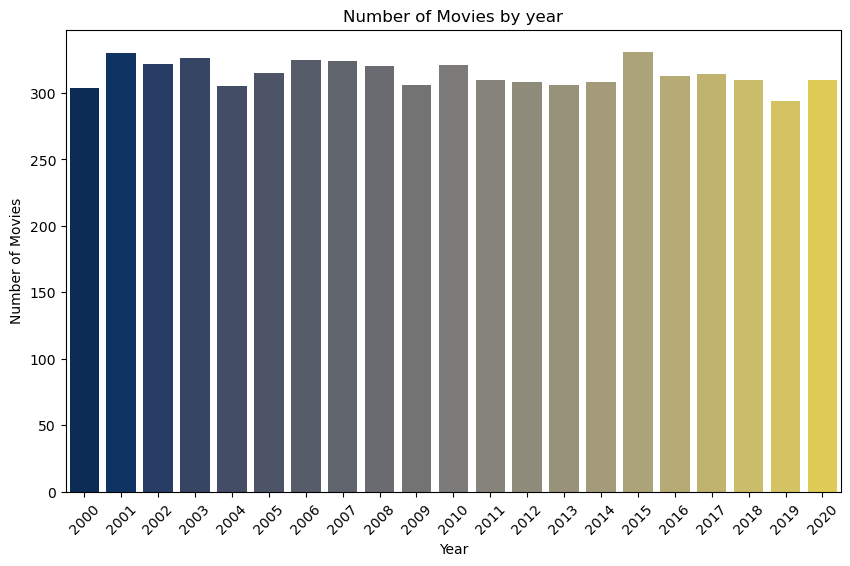

In [154]:
# Count movies by languages
year_counts = dataset['release_year'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette='cividis')
plt.title('Number of Movies by year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

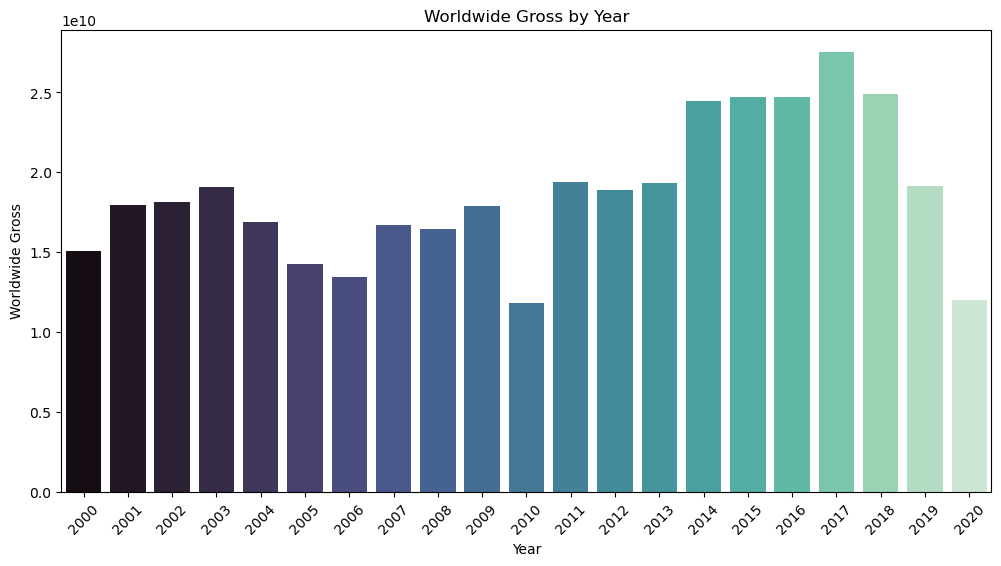

In [175]:
yearly_gross = dataset.groupby('release_year')['worldwide_gross'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_gross.index, y=yearly_gross.values, palette='mako')
plt.title('Worldwide Gross by Year')
plt.xlabel('Year')
plt.ylabel('Worldwide Gross')
plt.xticks(rotation=45)
plt.show()

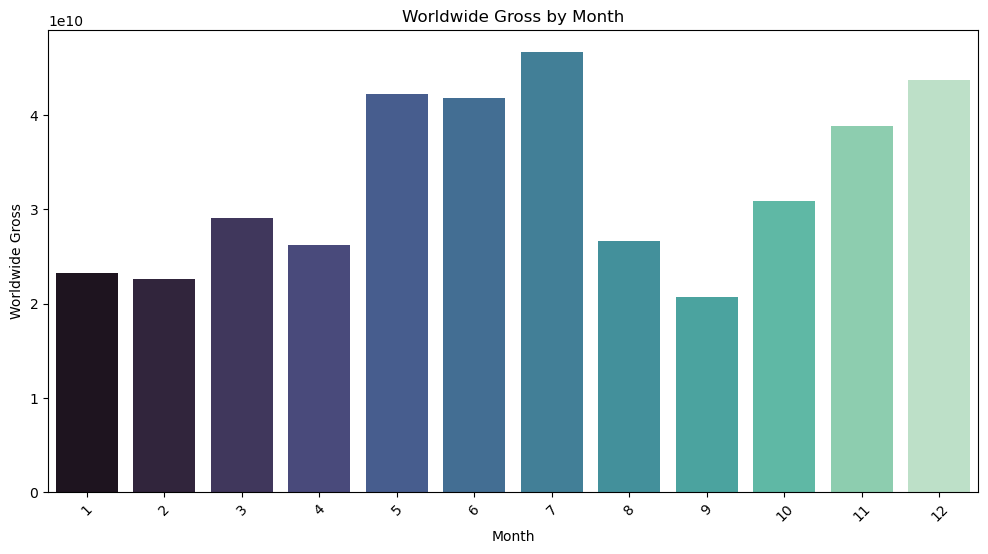

In [176]:
monthly_gross = dataset.groupby('release_month')['worldwide_gross'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_gross.index, y=monthly_gross.values, palette='mako')
plt.title('Worldwide Gross by Month')
plt.xlabel('Month')
plt.ylabel('Worldwide Gross')
plt.xticks(rotation=45)
plt.show()

**Movie and Director Trends**

Most recurrent directors over the years

In [216]:
# Number of movies per director
df_filtered = dataset[dataset['director'] != "Unknown"]

director_counts = df_filtered['director'].value_counts().head(20)
print(director_counts)

director
Steven Soderbergh     16
Ridley Scott          15
Woody Allen           15
Steven Spielberg      13
Kunihiko Yuyama       12
Clint Eastwood        11
Michael Bay           11
Robert Rodriguez      11
Antoine Fuqua         11
Shawn Levy            11
Guy Ritchie           10
Peter Berg            10
Tim Burton            10
Robert Zemeckis       10
Christopher Nolan     10
Rajiv Chilaka         10
M. Night Shyamalan    10
Richard Linklater      9
Uwe Boll               9
Dennis Dugan           9
Name: count, dtype: int64


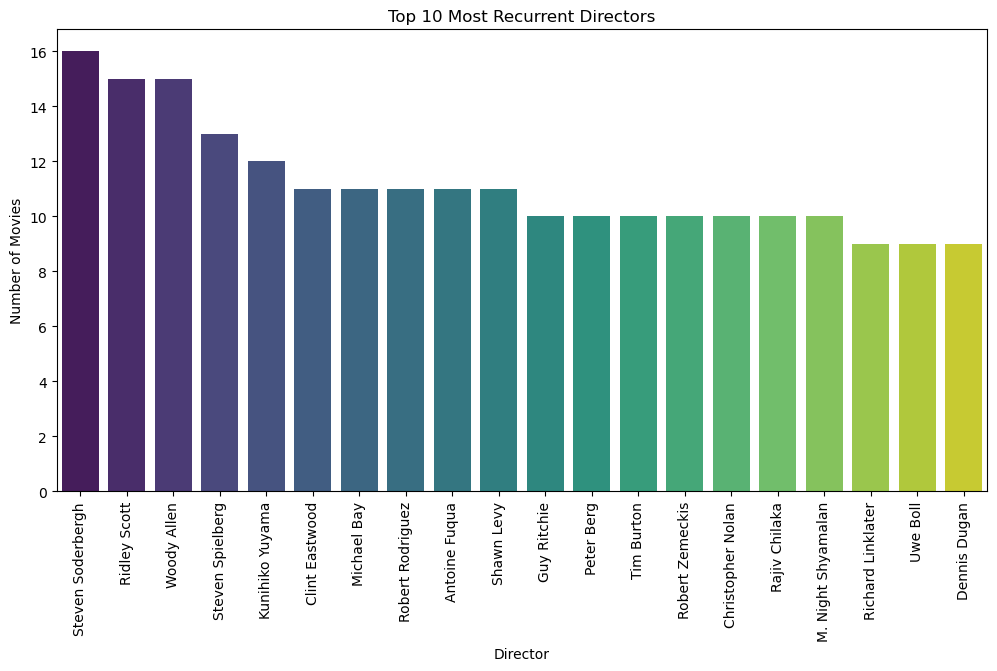

In [217]:
# Bar plot for top directors
plt.figure(figsize=(12, 6))
sns.barplot(x=director_counts.index, y=director_counts.values, palette='viridis')
plt.title('Top 10 Most Recurrent Directors')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

Most recurrent directors over the years

In [199]:
from collections import Counter
actors_filtered  = dataset[dataset['actors'].apply(lambda x: len(x) > 0)]
actors_list = actors_filtered['actors'].str.split(', ').explode()
actor_counts = Counter(actors_list).most_common(21) 
actor_counts_sliced = actor_counts[1:21]# Top 10 actors
print(actor_counts_sliced)

[("['Nicolas Cage'", 33), ("['Adam Sandler'", 29), ("['Johnny Depp'", 23), ("['Dwayne Johnson'", 22), ("['Mark Wahlberg'", 22), ("['Jason Statham'", 21), ("['Will Ferrell'", 20), ("['Denzel Washington'", 20), ("['Matt Damon'", 20), ("['Ryan Reynolds'", 20), ("['George Clooney'", 20), ("['Ben Stiller'", 19), ("['Ben Affleck'", 19), ("['Tom Cruise'", 19), ("['Christian Bale'", 19), ("['Matthew McConaughey'", 18), ("['Keanu Reeves'", 18), ("['Jackie Chan'", 17), ("['Liam Neeson'", 17), ("['Bruce Willis'", 17)]


C:\Users\akala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


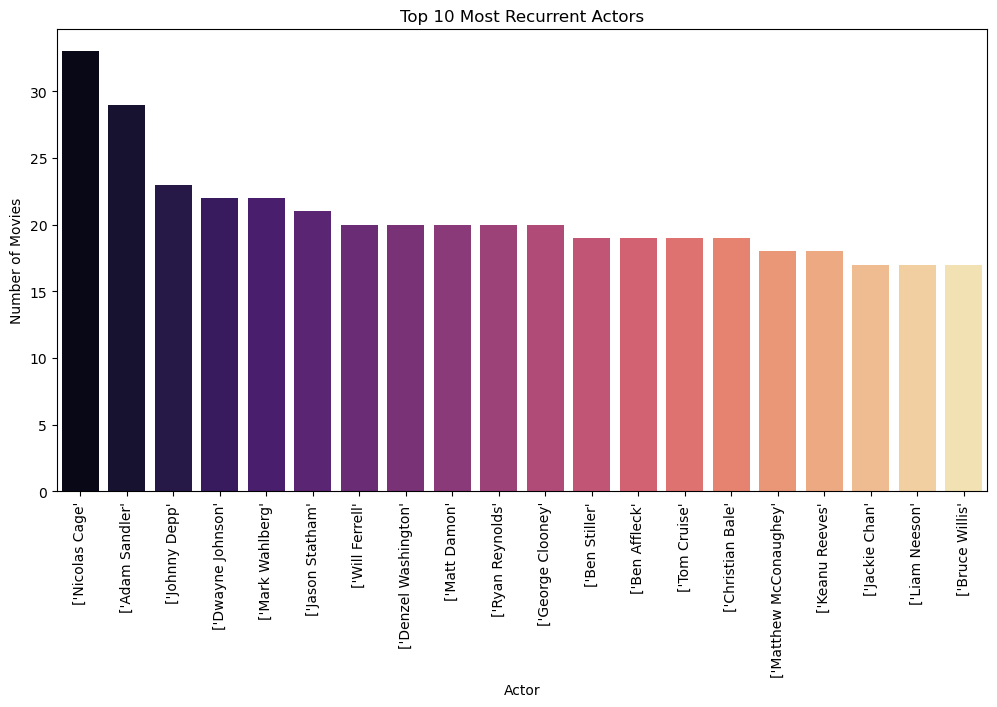

In [200]:
plt.figure(figsize=(12, 6))
sns.barplot(x=[actor[0] for actor in actor_counts_sliced], y=[actor[1] for actor in actor_counts_sliced], palette='magma')
plt.title('Top 10 Most Recurrent Actors')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

**Trends in the number of movies directed by prominent directors**

In [225]:
# top-grossing movies
top_gorss_cutoff = dataset['worldwide_gross'].quantile(0.90)
top_grossing_movies = dataset[dataset['worldwide_gross'] >= top_gorss_cutoff]

In [230]:
# top 10 directors line graph
top_director_df = df_filtered['director'].value_counts().head(10)
top_directors = top_director_df.index

In [231]:
top_directors_data = df_filtered[df_filtered['director'].isin(top_directors)]
directors_years_movies = top_directors_data.groupby(['director', 'release_year']).size().reset_index(name='movie_count')

C:\Users\akala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


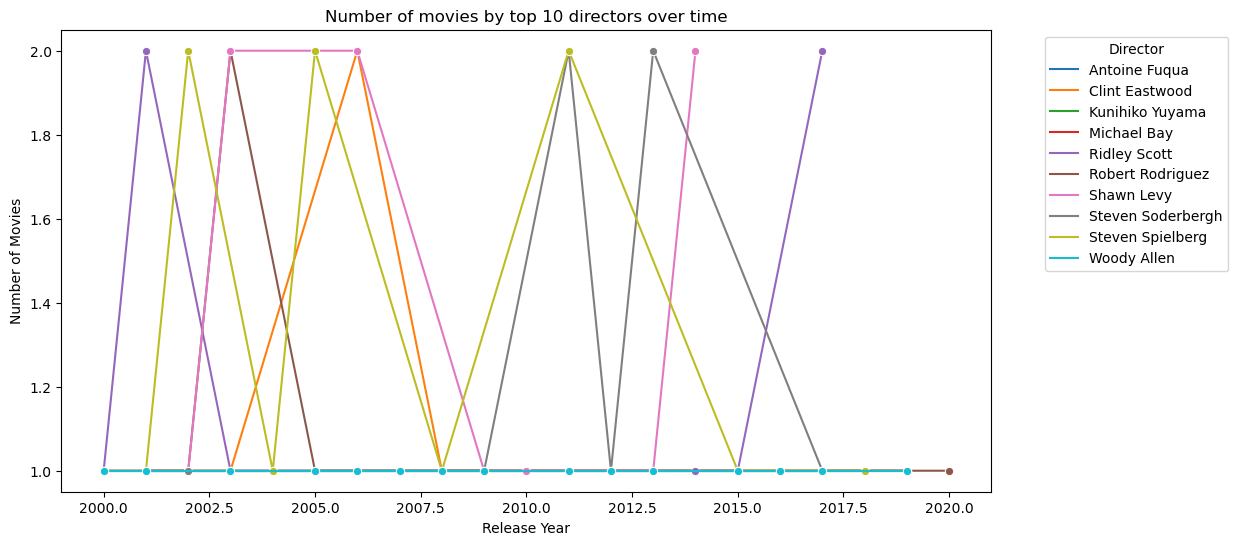

In [233]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=directors_years_movies, x='release_year', y='movie_count', hue='director', marker='o')
plt.title('Number of movies by top 10 directors over time')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.legend(title='Director', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [234]:
# Top-grossing movies for prominent directors
top_grossing_prominent_directors = top_grossing_movies[top_grossing_movies['director'].isin(top_directors)]

# Count top-grossing movies by director
top_grossing_director_counts = top_grossing_prominent_directors['director'].value_counts().reset_index()
top_grossing_director_counts.columns = ['director', 'top_grossing_count']

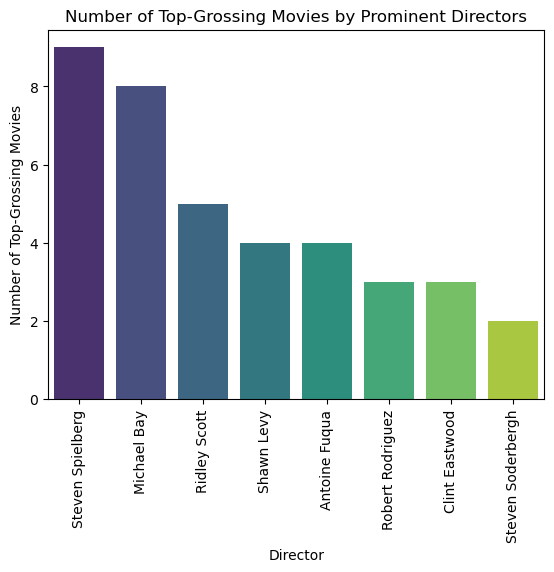

In [239]:
# Line graph for top grossing movies by each director
sns.barplot(data=top_grossing_director_counts, x='director', y='top_grossing_count', palette='viridis')
plt.title('Number of Top-Grossing Movies by Prominent Directors')
plt.xlabel('Director')
plt.ylabel('Number of Top-Grossing Movies')
plt.xticks(rotation=90)
plt.show()


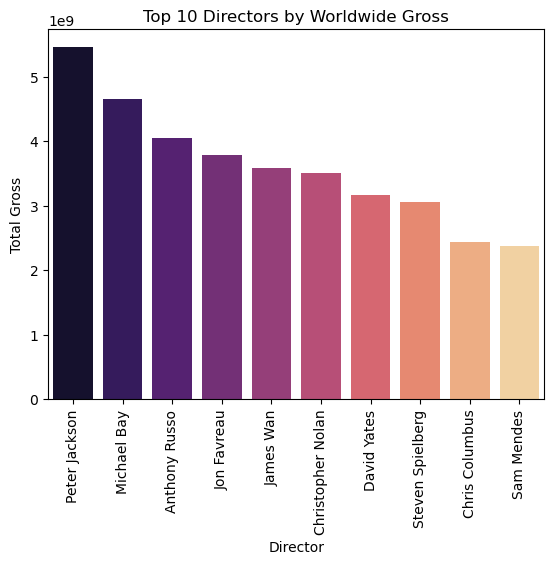

In [243]:
# Directors by worldwide gross
director_gross = dataset.groupby('director')['worldwide_gross'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=director_gross.index, y=director_gross.values, palette='magma')
plt.title('Top 10 Directors by Worldwide Gross')
plt.xlabel('Director')
plt.ylabel('Total Gross')
plt.xticks(rotation=90)
plt.show()

**Analyze the influence of certain directors or actors on movie success.**

We have already identified the top directors in highest grossing movies
Now I will analyze which actors influece highest grossing movies and imdb ratings

**Evolution of different movie genres over the years**

Most successful genres in terms of box office revenue

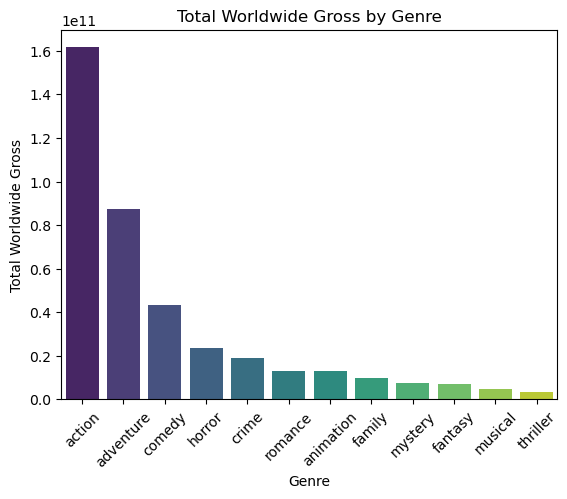

In [269]:
# Worldwide gross by genre
genre_gross = dataset.groupby('genre')['worldwide_gross'].sum().sort_values(ascending=False)


sns.barplot(x=genre_gross.index, y=genre_gross.values, palette='viridis')
plt.title('Total Worldwide Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Worldwide Gross')
plt.xticks(rotation=45)
plt.show()

Analysing the popularity of different genres over the years through vote count

In [267]:
genre_vote_counts = dataset.groupby(['genre', 'release_year'])['vote_count'].sum().reset_index()

C:\Users\akala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


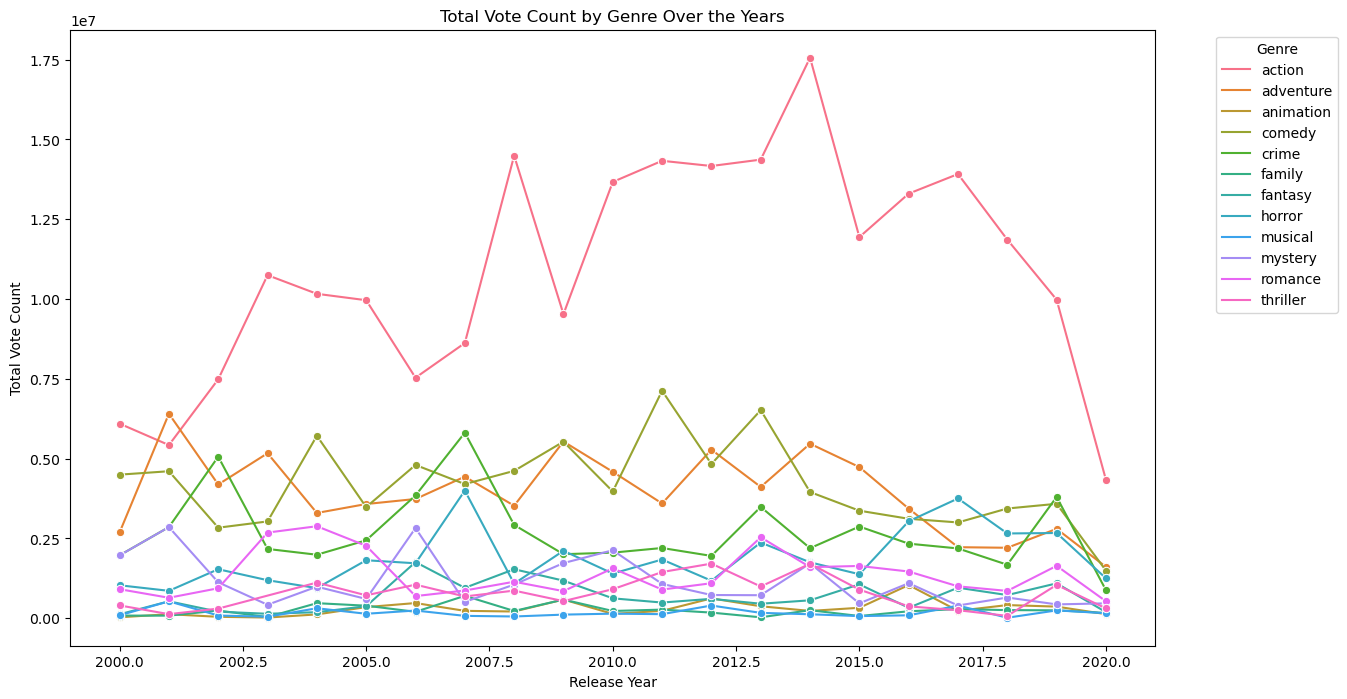

In [268]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=genre_vote_counts, x='release_year', y='vote_count', hue='genre', marker='o')
plt.title('Total Vote Count by Genre Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Total Vote Count')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\akala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


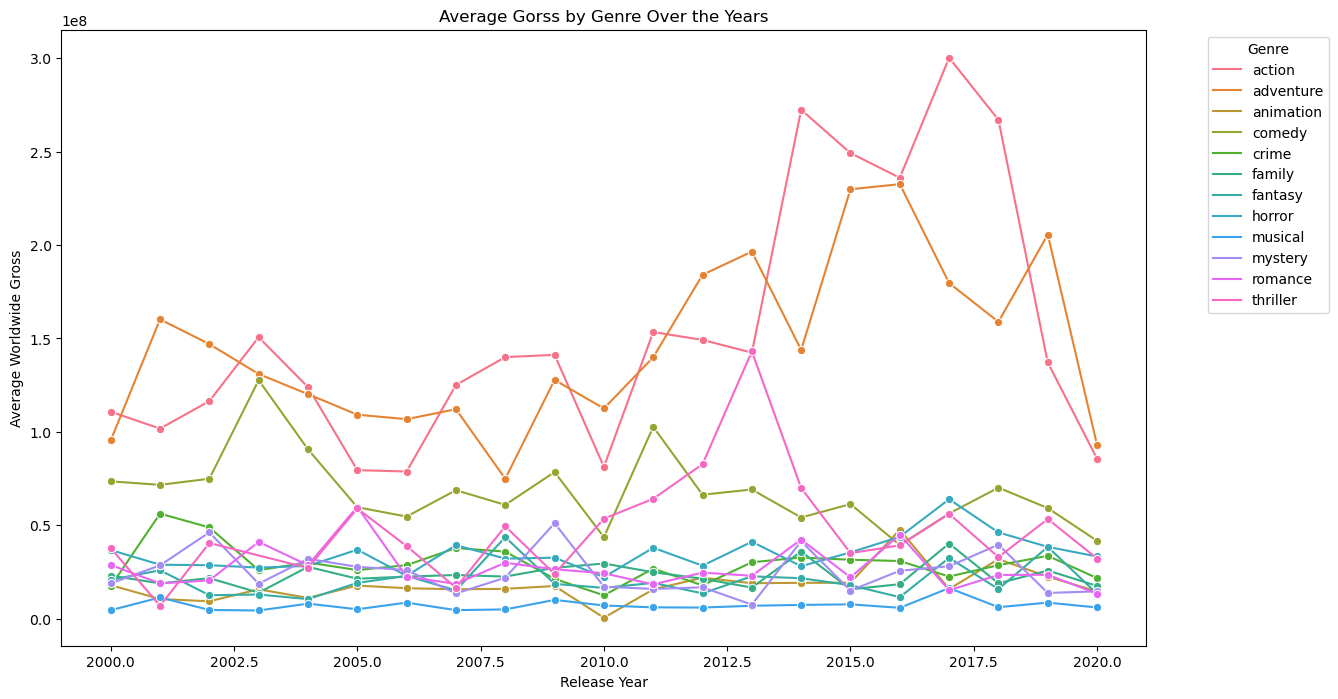

In [273]:
genre_gross = dataset.groupby(['genre', 'release_year'])['worldwide_gross'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=genre_gross, x='release_year', y='worldwide_gross', hue='genre', marker='o')
plt.title('Average Gorss by Genre Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Worldwide Gross')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Correlations and Discoveries**

In [283]:
dataset['is_english'] = dataset['origin_Language'].apply(lambda x: 1 if x == 'English' else 0)

In [284]:
dataset['is_usa'] = dataset['origin_Country'].apply(lambda x: 1 if x == 'United States' else 0)

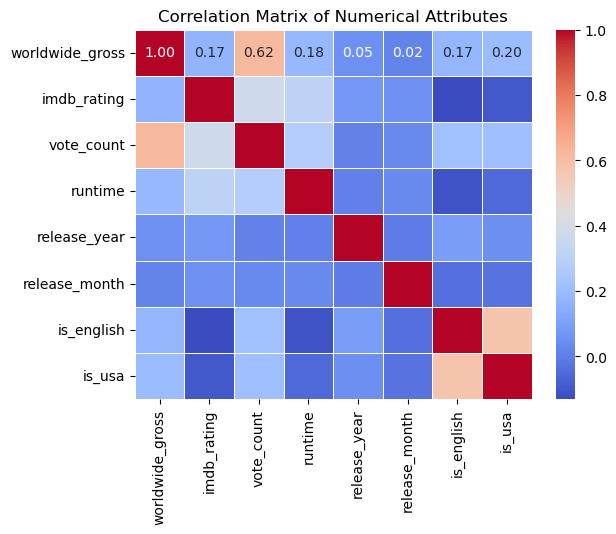

In [285]:
numerical_attributes = ['worldwide_gross','imdb_rating', 'vote_count',  'runtime', 'release_year', 'release_month','is_english','is_usa']
correlation_matrix = dataset[numerical_attributes].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Attributes')
plt.show()

C:\Users\akala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

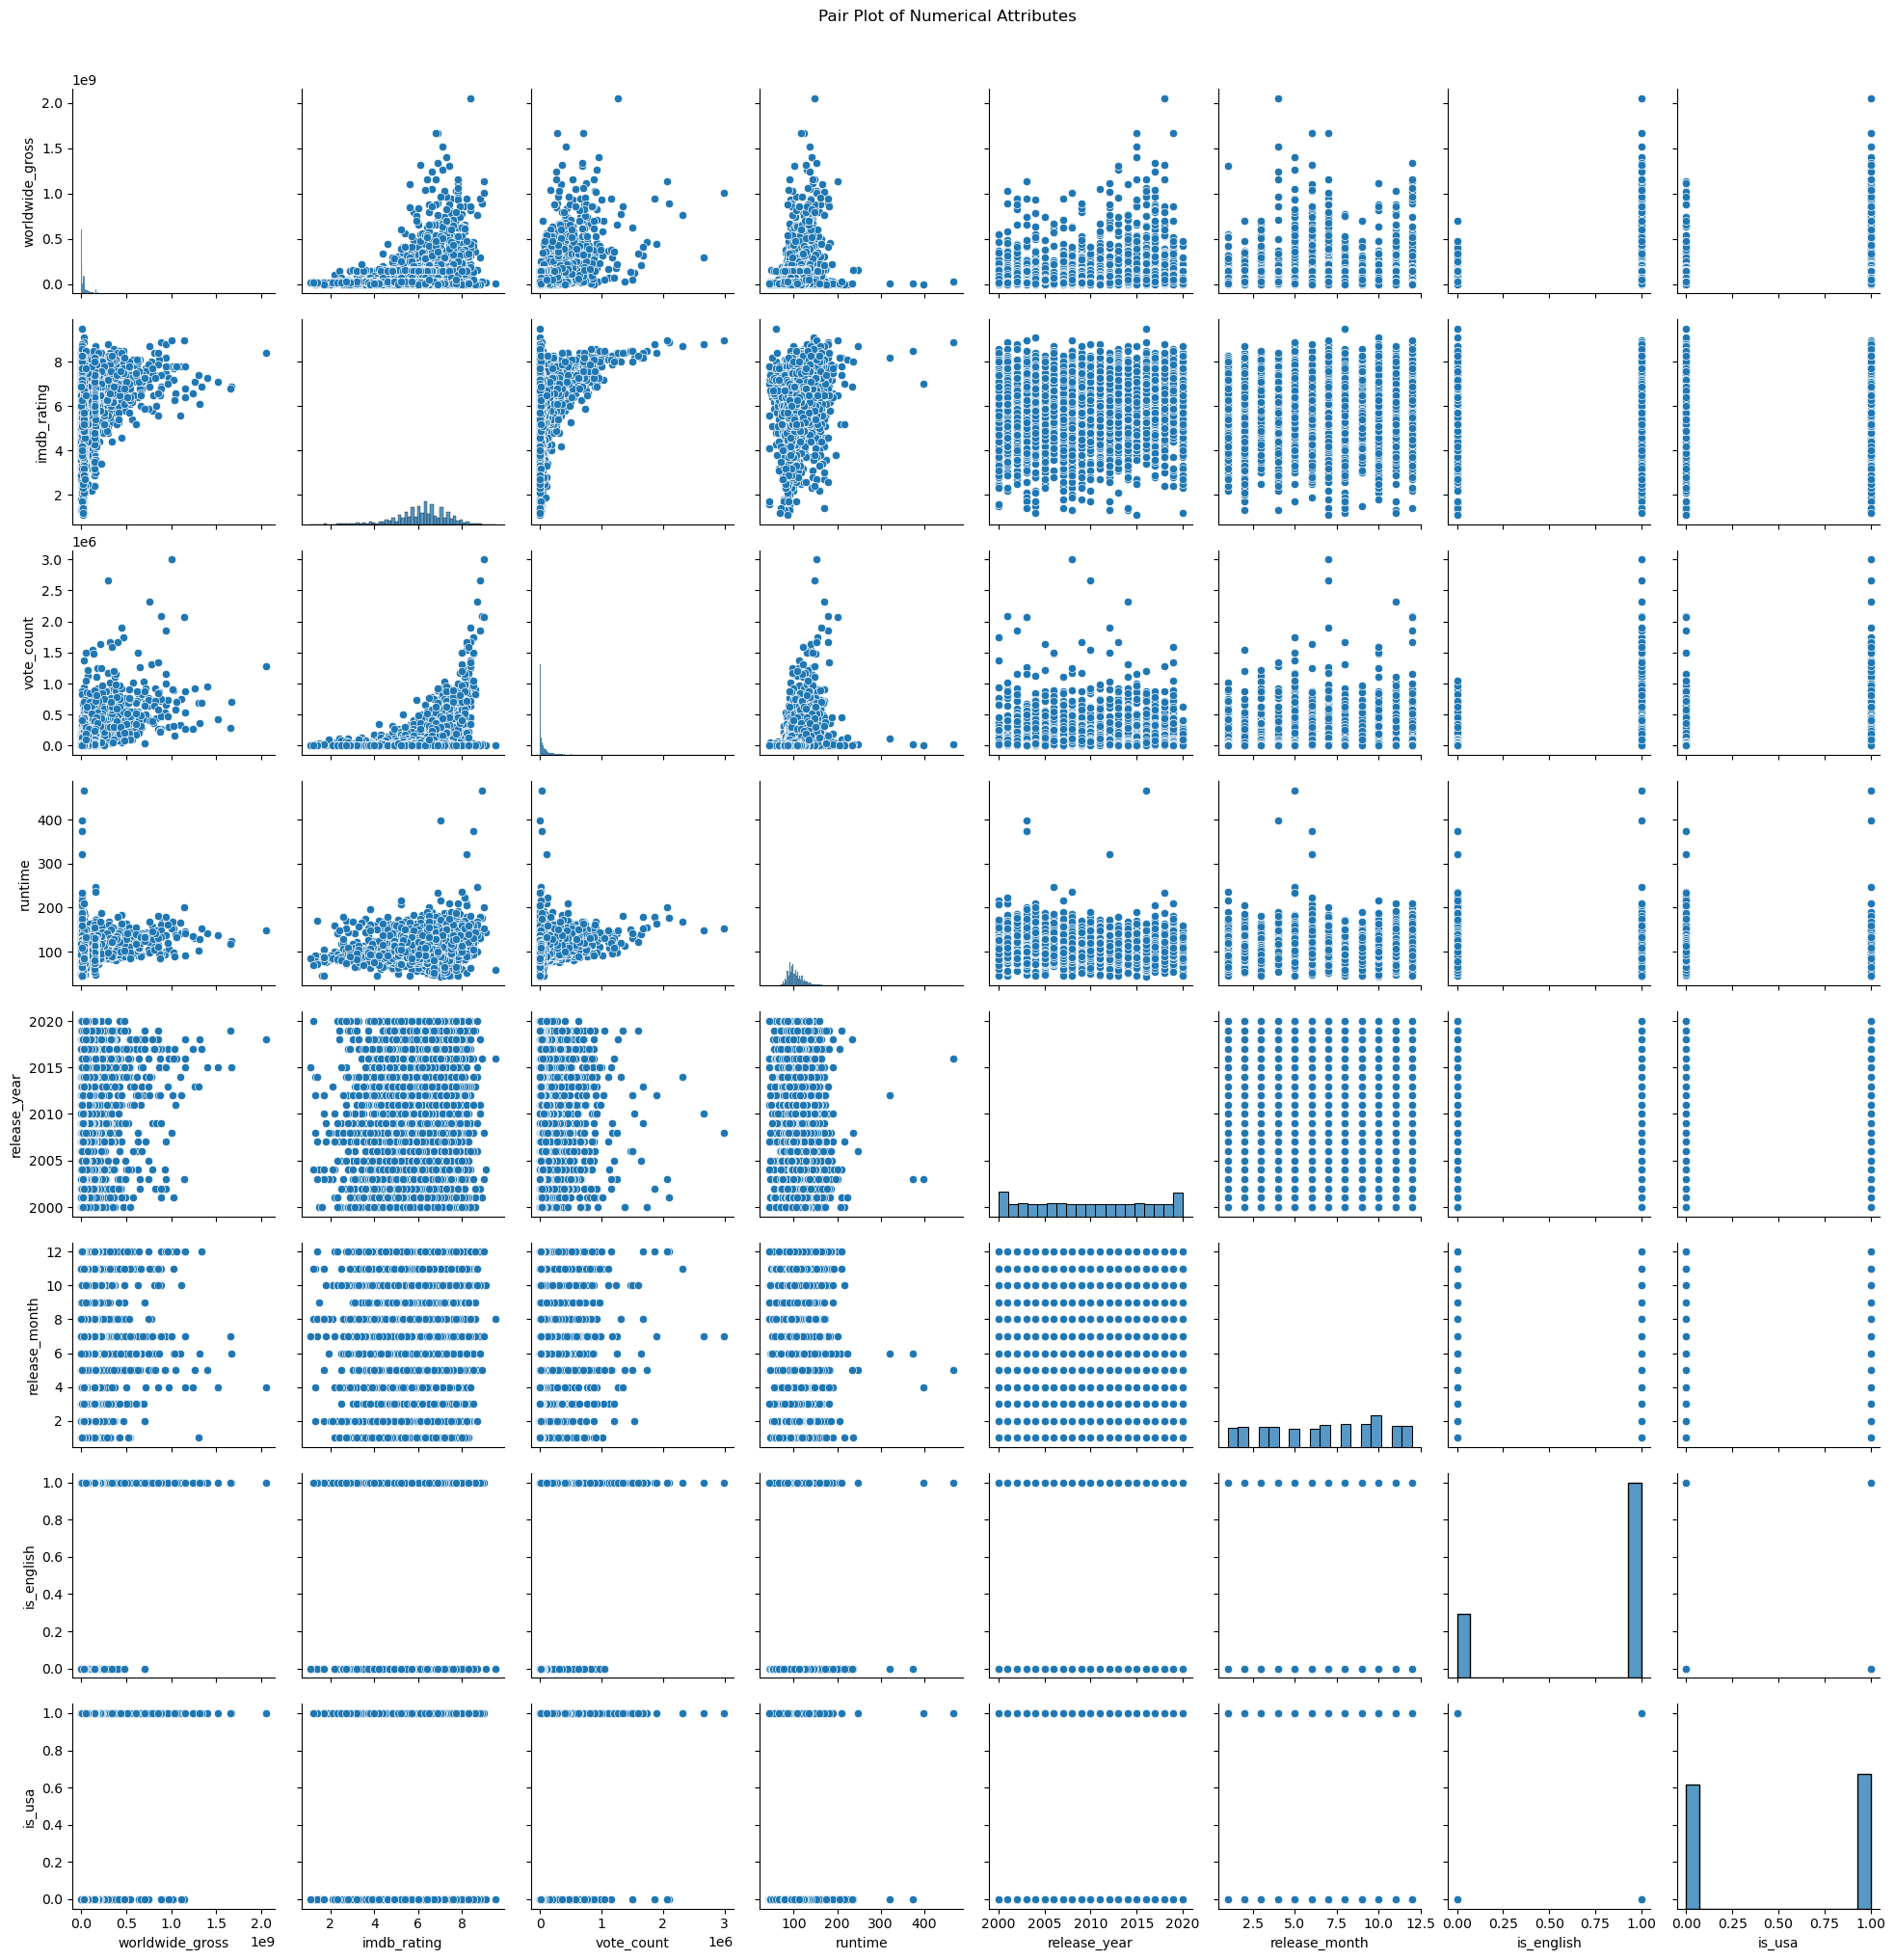

In [288]:
# relationship between all numerical columns
sns.pairplot(dataset[numerical_attributes])
plt.suptitle('Pair Plot of Numerical Attributes', y=1.02)
plt.show()

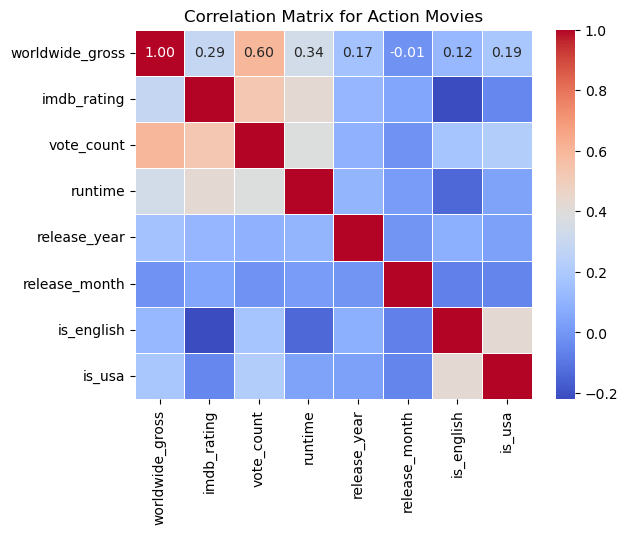

In [290]:
action_movies = dataset[dataset['genre'].str.contains('action', case=False, na=False)]

# correlation for action movie dataset
action_correlation = action_movies[numerical_attributes].corr()


sns.heatmap(action_correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Action Movies')
plt.show()